# Import

In [1]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from file_py.run_log_parser import RunLogParser
from file_py.csv_preprocessing_scaler import CsvPreprocessingScaler
from file_py.correlation_matrix_plots import CorrelationMatrixPlots

# Preprocessing

In [3]:
df = CsvPreprocessingScaler.read_csv_file("file_csv/20240603 - estrazione di test.csv")

In [4]:
df_raw = CsvPreprocessingScaler.RawPreprocessing(df)

df_Le = CsvPreprocessingScaler.LEPreprocessing(df)
df_OH = CsvPreprocessingScaler.OhePreprocessing(df)

In [5]:
df_std_LE = CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.LEPreprocessing(df))
df_std_OH = CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.OhePreprocessing(df))

# Test

In [6]:
file_path = 'file_csv/example-run-log-attacks.csv'
result_df_Le = RunLogParser.process_attacks(file_path, CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.LEPreprocessing(df)))
result_df_OH = RunLogParser.process_attacks(file_path, CsvPreprocessingScaler.stdScaler(CsvPreprocessingScaler.OhePreprocessing(df)))

# Graphic Analysis of Attack

In [7]:
from file_py.plot_value_counts import PlotValueCounts
from file_py.plot_cake_attack import PlotCakeAttack
from file_py.plot_mitre_id import PlotMitreId
from file_py.plot_distributions import PlotDistributions

In [8]:
result_df_Raw = RunLogParser.process_attacks(file_path, CsvPreprocessingScaler.RawPreprocessing(df))

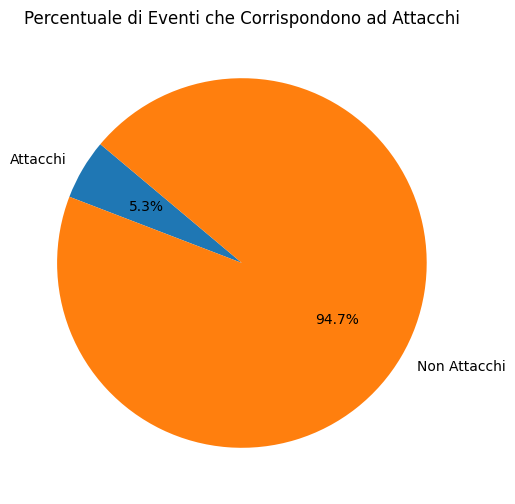

In [9]:
PlotCakeAttack.plot_cake_attack(result_df_Raw)

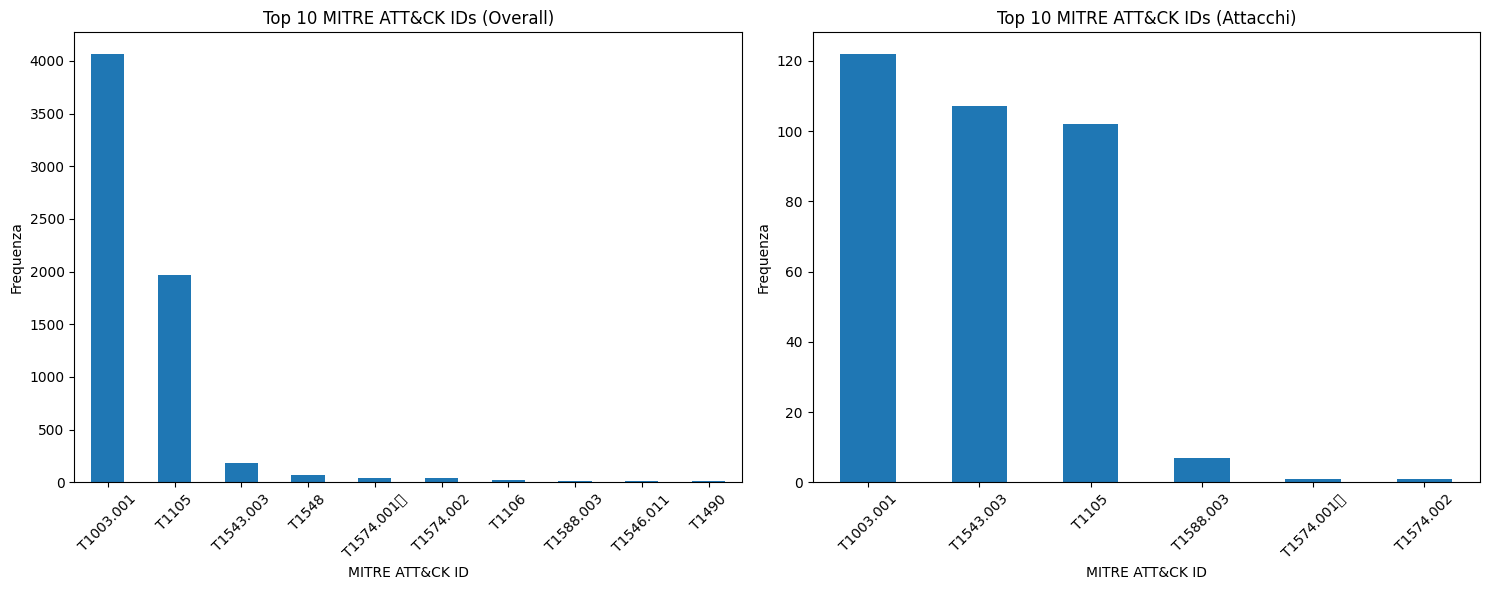

In [10]:
PlotMitreId.plot_top_10_mitre_id(result_df_Raw)

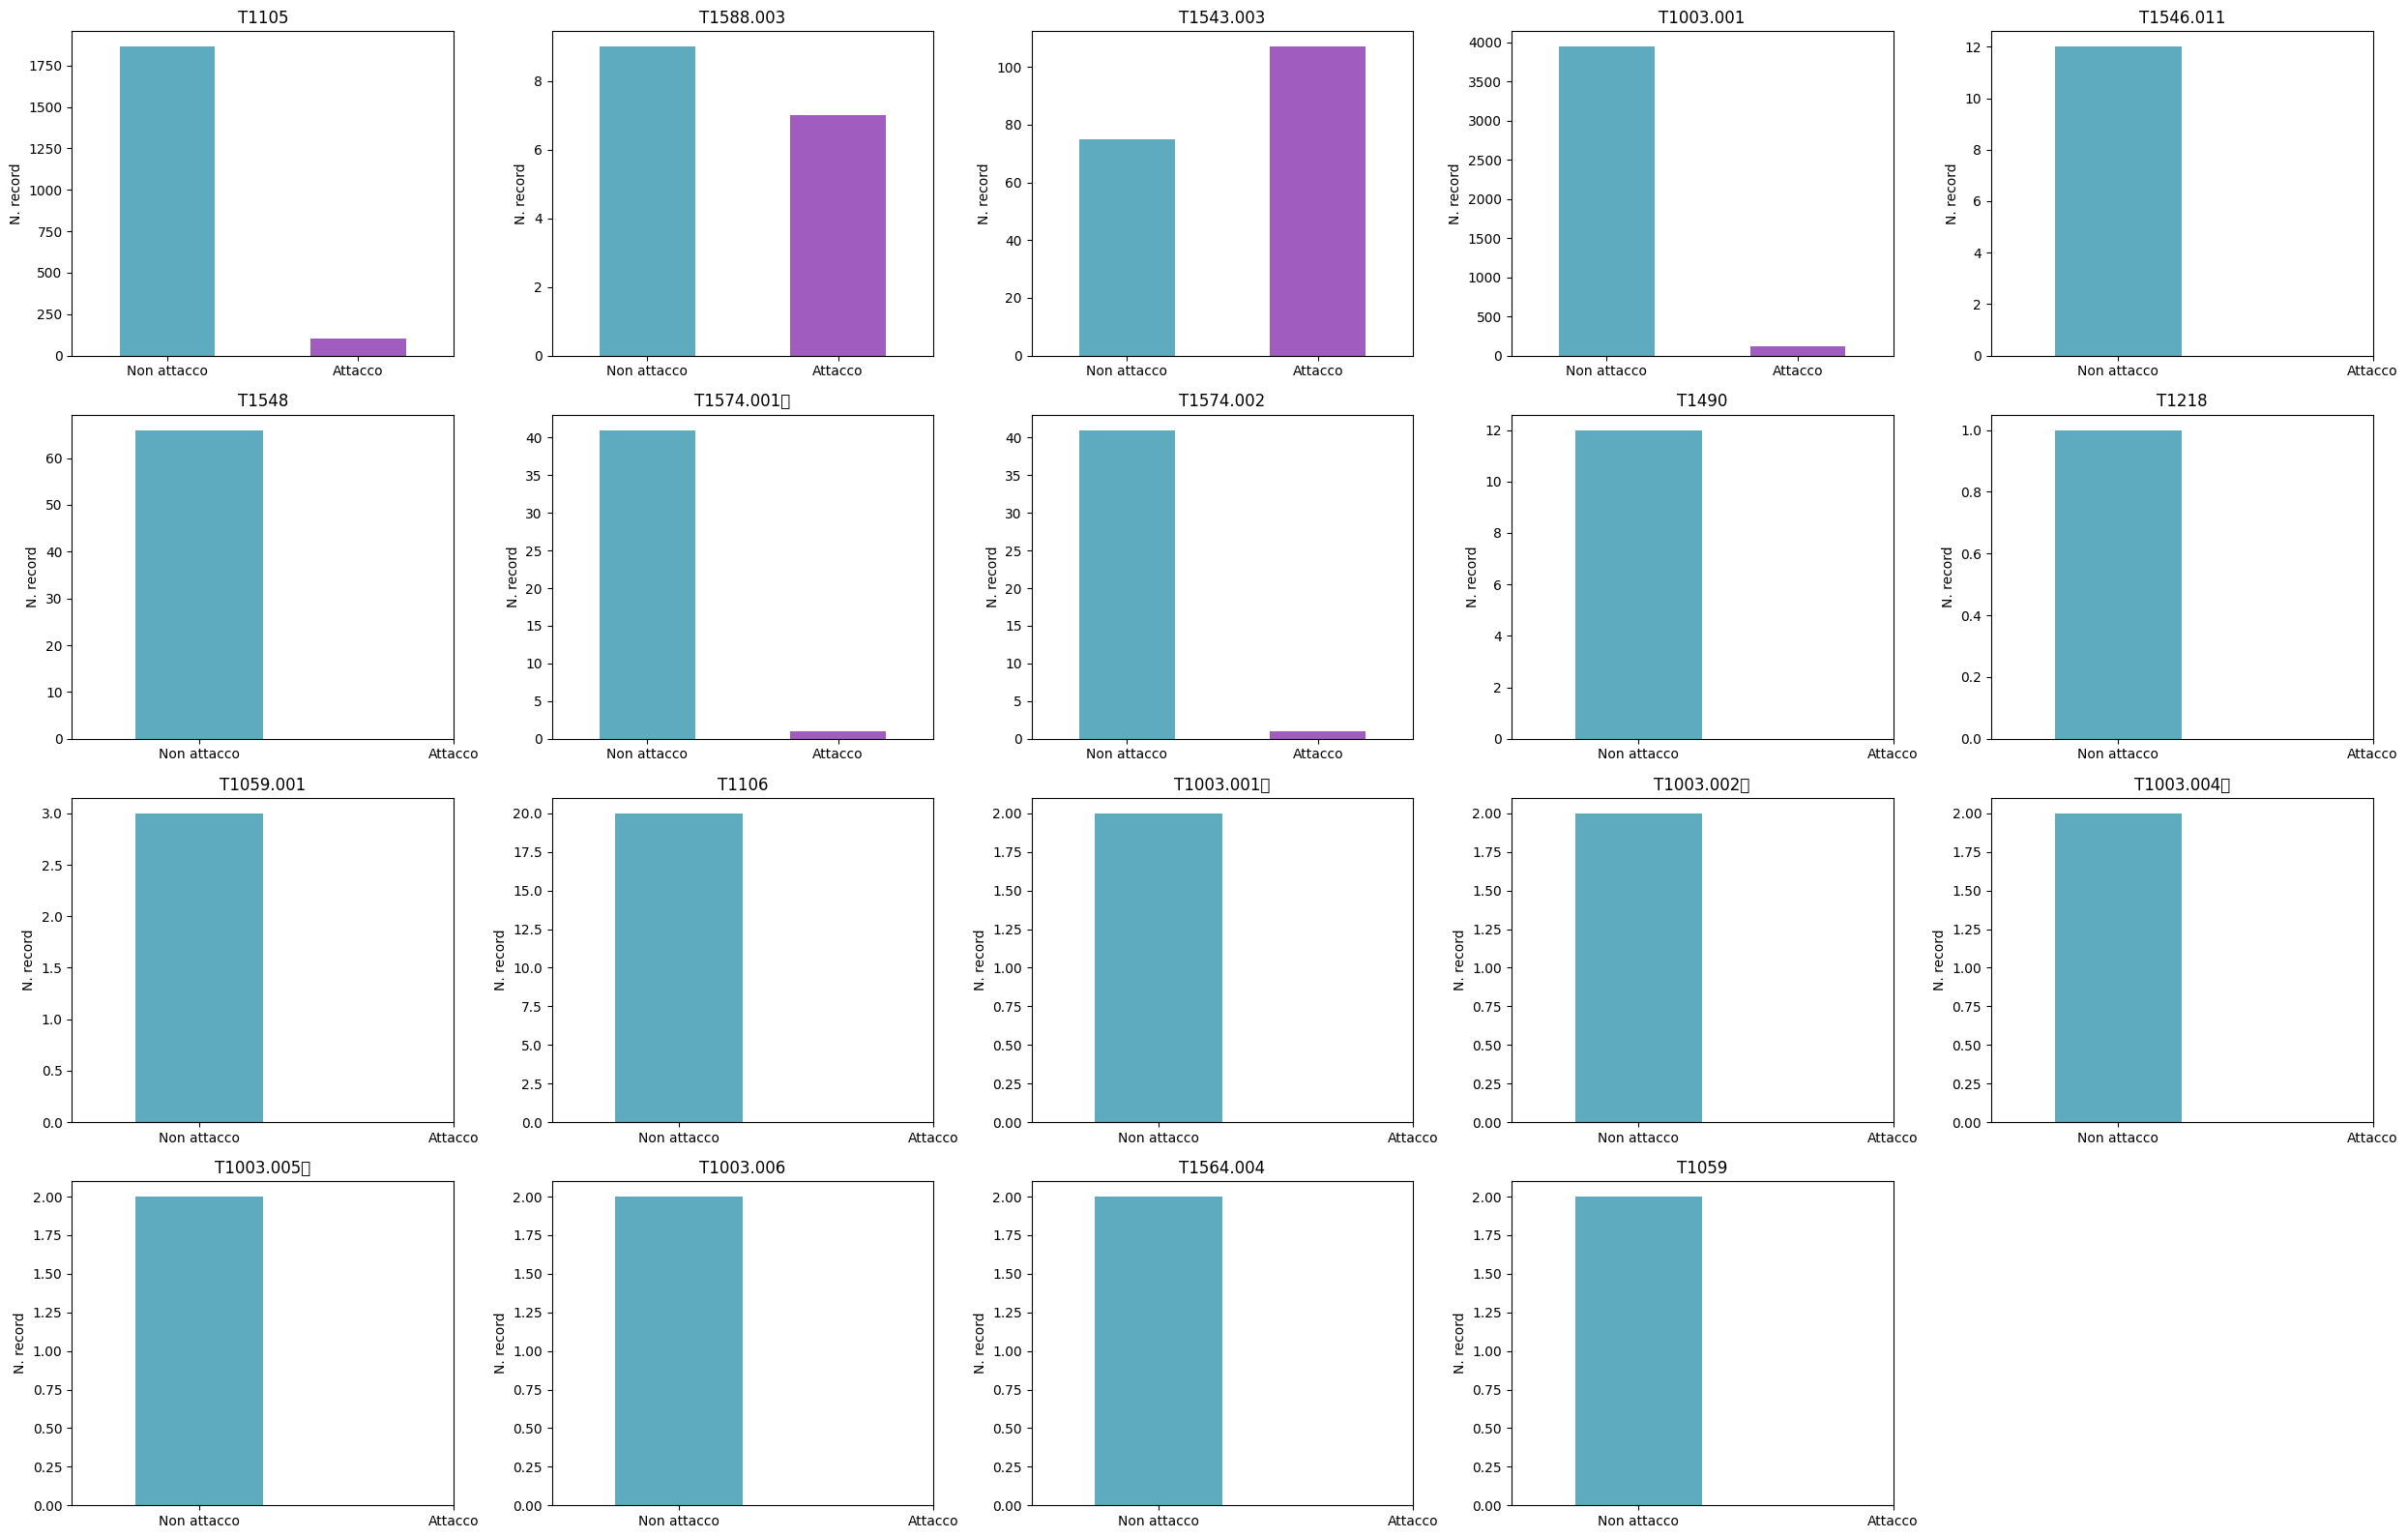

In [11]:
PlotValueCounts.plot_value_counts_per_unique(result_df_Raw)

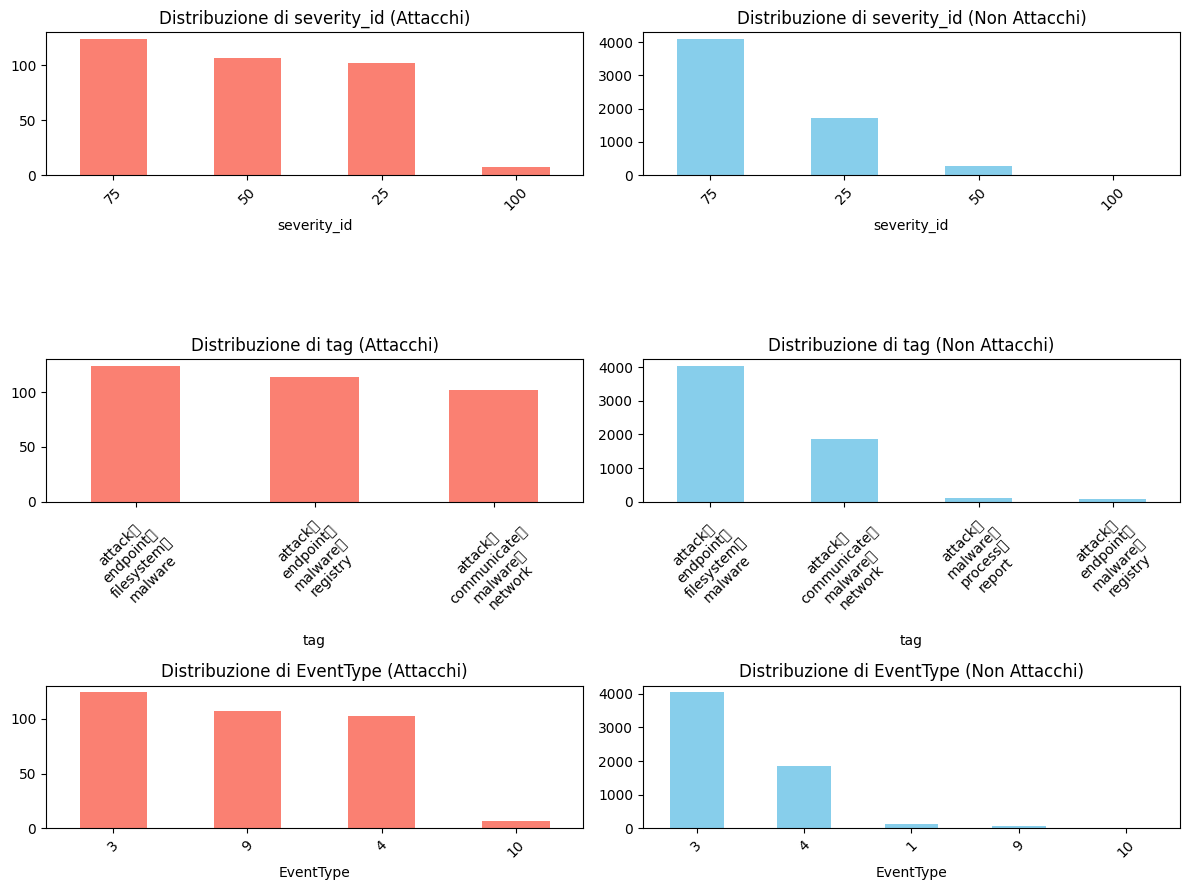

In [12]:
PlotDistributions.plot_distributions(result_df_Raw)

# Correlation Matrix

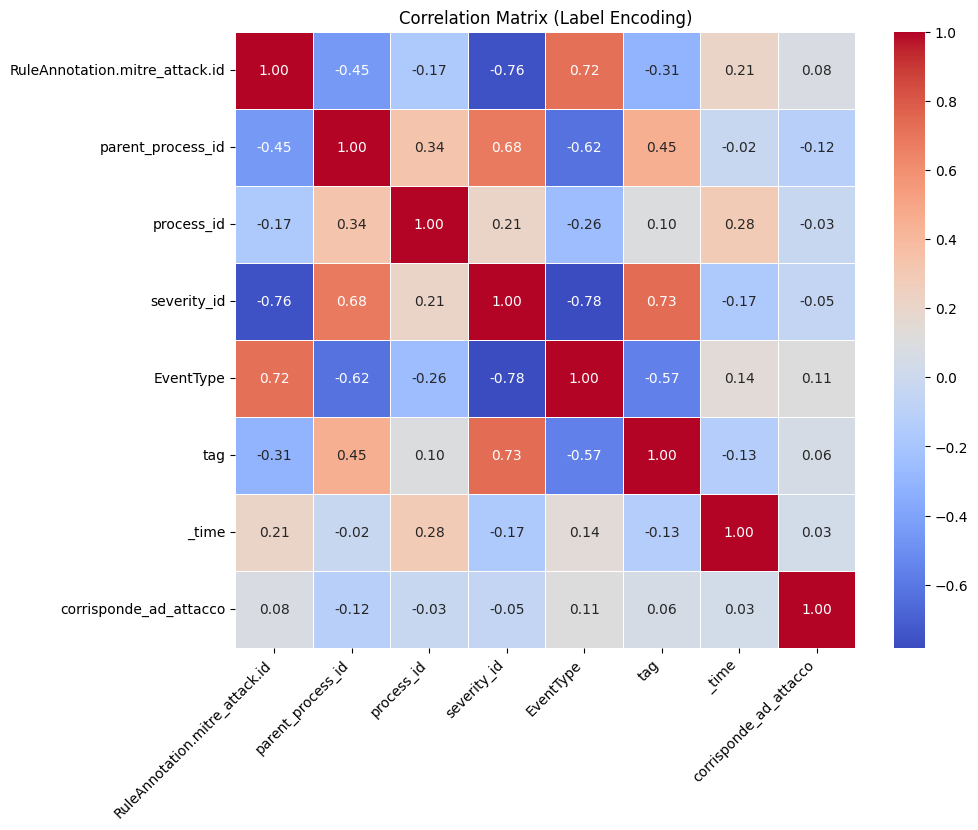

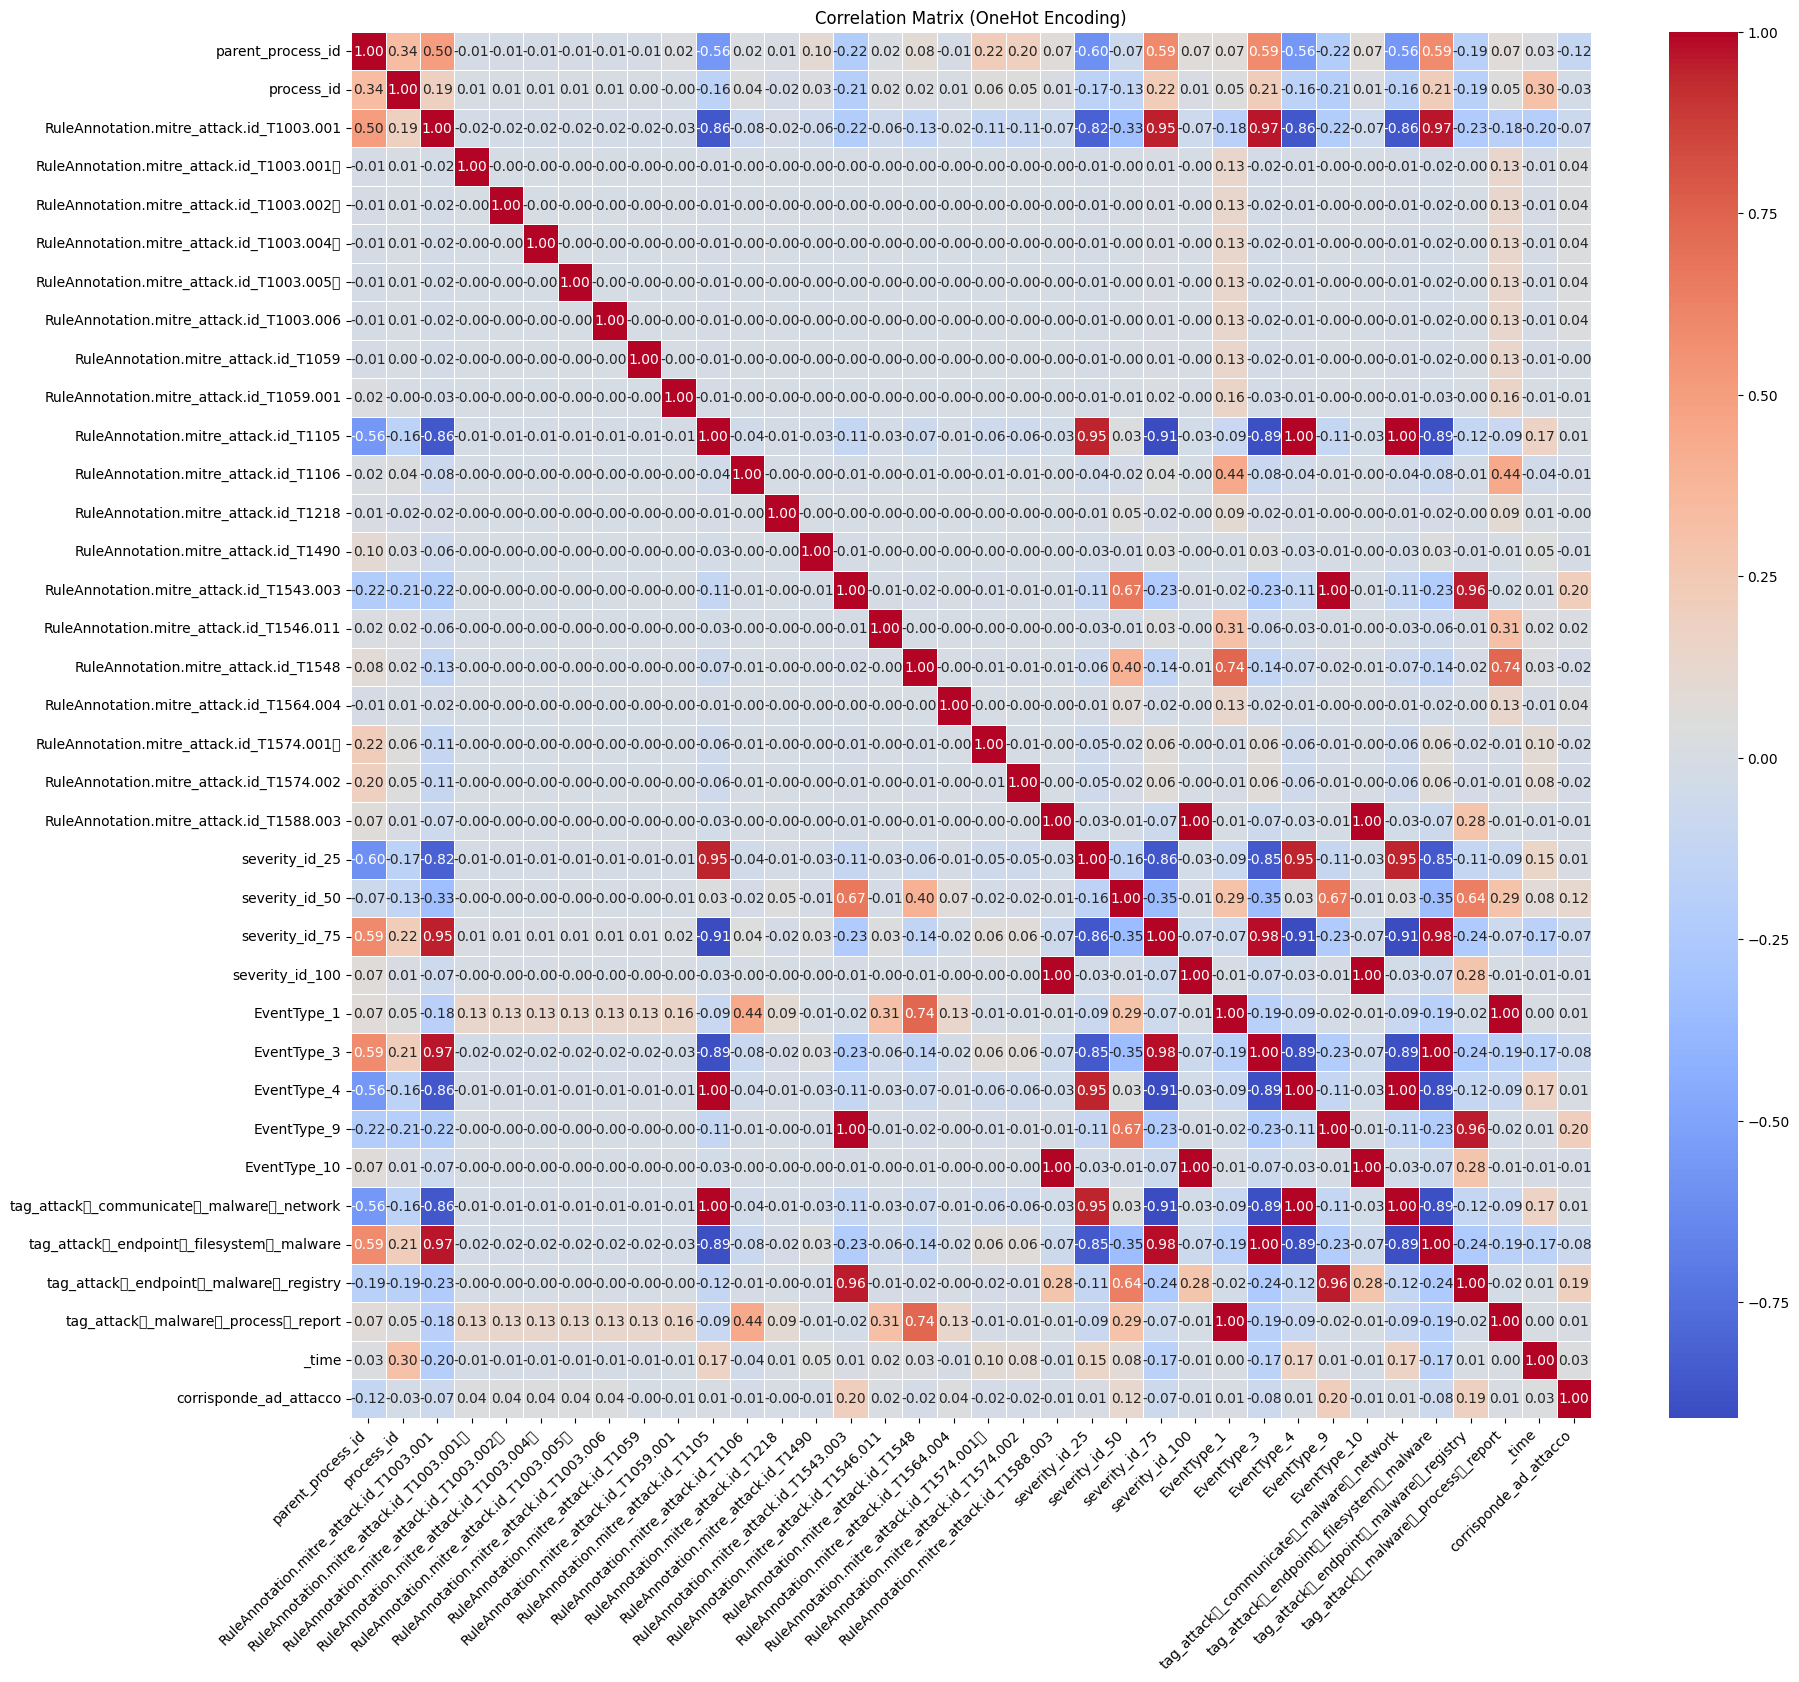

In [13]:
CorrelationMatrixPlots.plot_correlation_matrix(result_df_Le, 'Correlation Matrix (Label Encoding)')
CorrelationMatrixPlots.plot_correlation_matrix_big(result_df_OH, 'Correlation Matrix (OneHot Encoding)')

# ML

In [14]:
from file_py.preprocessing_train_test_split import PreprocessingTrainTestSplit
from file_py.initial_training import InitialTraining
from file_py.hyperparameter_tuning import HyperparameterTuning
from file_py.advanced_models import AdvancedModels
from file_py.deep_learning_model import DeepLearningModel
from file_py.model_evaluator import ModelEvaluator

### OneHot

In [15]:
# Split data
X_train_OH, X_test_OH, y_train_OH, y_test_OH = PreprocessingTrainTestSplit.split_data(result_df_OH, "corrisponde_ad_attacco")

# Initial model training and evaluation
InitialTraining.train_and_evaluate_initial_models(X_train_OH, y_train_OH, X_test_OH, y_test_OH)

# Hyperparameter tuning
best_models_OH = HyperparameterTuning.tune_hyperparameters(X_train_OH, y_train_OH)

# Evaluate best models on test set
evaluator_OH = ModelEvaluator(best_models_OH)
evaluation_results_OH = evaluator_OH.evaluate_models(X_test_OH, y_test_OH)

# Train XGBoost model
AdvancedModels.train_xgboost(X_train_OH, y_train_OH, X_test_OH, y_test_OH)

# Train deep learning model
DeepLearningModel.train_deep_learning_model(X_train_OH, y_train_OH, X_test_OH, y_test_OH)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1523
           1       0.76      0.61      0.68        88

    accuracy                           0.97      1611
   macro avg       0.87      0.80      0.83      1611
weighted avg       0.97      0.97      0.97      1611


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1523
           1       0.81      0.28      0.42        88

    accuracy                           0.96      1611
   macro avg       0.88      0.64      0.70      1611
weighted avg       0.95      0.96      0.95      1611


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1523
           1       0.78      0.52      0.63        88

    accuracy                           0.97      1611
   macro avg       0.88  

<Sequential name=sequential, built=True>

### Label

In [16]:
# Split data
X_train_Le, X_test_Le, y_train_Le, y_test_Le = PreprocessingTrainTestSplit.split_data(result_df_Le, "corrisponde_ad_attacco")

# Initial model training and evaluation
InitialTraining.train_and_evaluate_initial_models(X_train_Le, y_train_Le, X_test_Le, y_test_Le)

# Hyperparameter tuning
best_models_Le = HyperparameterTuning.tune_hyperparameters(X_train_Le, y_train_Le)

# Evaluate best models on test set
evaluator_Le = ModelEvaluator(best_models_Le)
evaluation_results_Le = evaluator_Le.evaluate_models(X_test_Le, y_test_Le)

# Train XGBoost model
AdvancedModels.train_xgboost(X_train_Le, y_train_Le, X_test_Le, y_test_Le)

# Train deep learning model
DeepLearningModel.train_deep_learning_model(X_train_Le, y_train_Le, X_test_Le, y_test_Le)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1523
           1       0.77      0.60      0.68        88

    accuracy                           0.97      1611
   macro avg       0.87      0.80      0.83      1611
weighted avg       0.97      0.97      0.97      1611


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1523
           1       0.81      0.28      0.42        88

    accuracy                           0.96      1611
   macro avg       0.88      0.64      0.70      1611
weighted avg       0.95      0.96      0.95      1611


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1523
           1       0.74      0.51      0.60        88

    accuracy                           0.96      1611
   macro avg       0.85  

<Sequential name=sequential_1, built=True>